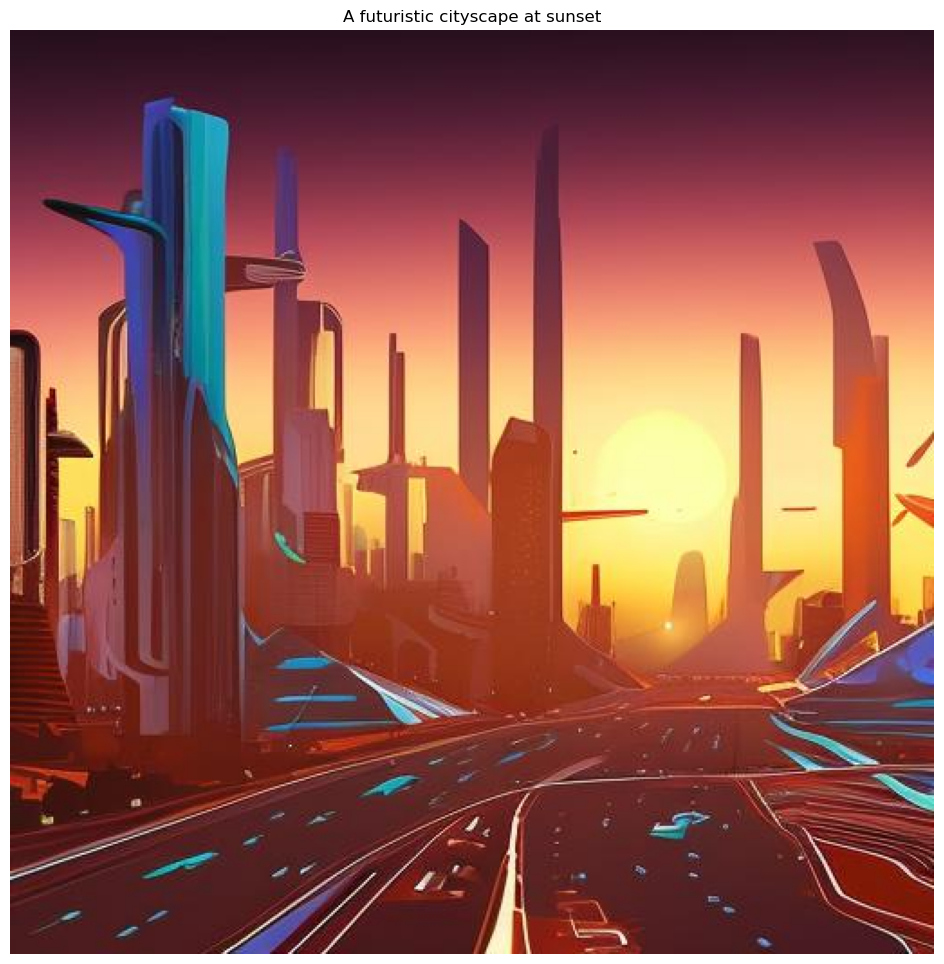

In [1]:
#!/usr/bin/env python
# coding: utf-8



import boto3
import json

# Define your endpoint name
endpoint_name = 'jumpstart-dft-stable-diffusion-v2-1-20241014-162250'


# Function to send the prompt to SageMaker
def query_endpoint(prompt):
    client = boto3.client('runtime.sagemaker')
    
    # Define payload with the prompt and other parameters
    payload = {
        "prompt": prompt, 
        "width": 512, 
        "height": 512, 
        "num_images_per_prompt": 1, 
        "num_inference_steps": 50, 
        "guidance_scale": 7.5
    }

    # Query the endpoint and include the InferenceComponentName header
    response = client.invoke_endpoint(
        EndpointName=endpoint_name, 
        InferenceComponentName = 'model-txt2img-stabilityai-stable-diffusion-v2-1-20241014-162253',  # Use the correct inference component name
        ContentType='application/json', 
        Body=json.dumps(payload).encode('utf-8'),
        Accept='application/json;jpeg'
    )
    
    return response




# In[23]:


from PIL import Image
from io import BytesIO
import base64

# Function to parse the response and extract image and prompt
def parse_response(query_response):
    response_dict = json.loads(query_response['Body'].read())
    generated_images = response_dict['generated_images']
    prompt = response_dict['prompt']
    
    images = []
    for generated_image in generated_images:
        # Convert base64 to image
        image_decoded = BytesIO(base64.b64decode(generated_image.encode()))
        image = Image.open(image_decoded).convert("RGB")
        images.append(image)
    
    return images, prompt


# In[24]:


import matplotlib.pyplot as plt
import numpy as np

# Function to display the image
def display_image(img, prmpt):
    plt.figure(figsize=(12,12))
    plt.imshow(np.array(img))
    plt.axis('off')
    plt.title(prmpt)
    plt.show()


# In[25]:


prompt = "A futuristic cityscape at sunset"

# Query the model
response = query_endpoint(prompt)

# Parse the response to get the image
generated_images, prmpt = parse_response(response)

# Display the image
for img in generated_images:
    display_image(img, prmpt)





